In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns # for statistical data visualization

import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os

In [47]:
df=pd.read_csv("A:/python progs/datasets/banglore_price/bengaluru_house_prices.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [48]:
df.shape

(13320, 9)

In [49]:
df2 = df.drop('availability', axis=1).drop('balcony', axis=1).drop('society', axis=1).drop('area_type', axis=1).drop(1)


In [50]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [51]:

cat_cols = list(df2.select_dtypes(include=['object']).columns)
df[cat_cols].nunique()

location      1305
size            31
total_sqft    2117
dtype: int64

In [52]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [53]:
df2['location'].value_counts()
df2.fillna('Whitefield',inplace=True)

In [54]:
df2['size'].value_counts()
df2.fillna('2 BHK',inplace=True)

In [55]:
df2['bath'].value_counts()
df2.fillna('3.0',inplace=True)

In [56]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [57]:
df2.sample(10)

,location,size,total_sqft,bath,price
4259,EPIP Zone,2 BHK,1125,2.0,65.00
3063,Hegde Nagar,3 BHK,1703,3.0,113.00
8216,Akshaya Nagar,2 BHK,1300,2.0,54.00
10614,Hormavu,2 BHK,1015,2.0,39.08
6367,Hennur Road,4 BHK,2502,4.0,180.00
6616,Basaveshwara Nagar,2 BHK,1200,2.0,80.00
6726,Geleyara Balaga Layout,2 BHK,596,2.0,22.00
5399,Koramangala,3 BHK,1615,3.0,115.00
13215,Frazer Town,1 Bedroom,896,1.0,100.00
8387,Thigalarapalya,4 BHK,3122,6.0,235.00


In [58]:
df2 = df2[~df2['size'].str.contains('Whitefield')]


In [59]:
df2['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      825
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [60]:
df2['BHK']=df2['size'].apply(lambda x:int(x.split(" ")[0]))

C:\Users\yachi\AppData\Local\Temp\ipykernel_34404\925506221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(lambda x:int(x.split(" ")[0]))


In [61]:
df2.drop("size",axis=1)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
5,Whitefield,1170,2.0,38.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [62]:
df2.total_sqft.unique()

array(['1056', '1440', '1521', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [63]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True


In [64]:
isfloat(23.0)

True

In [65]:
df2[~df2['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,Whitefield,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,Whitefield,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,Whitefield,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [66]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [67]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)


C:\Users\yachi\AppData\Local\Temp\ipykernel_34404\3933387274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)


In [68]:
df2

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


C:\Users\yachi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yachi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yachi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

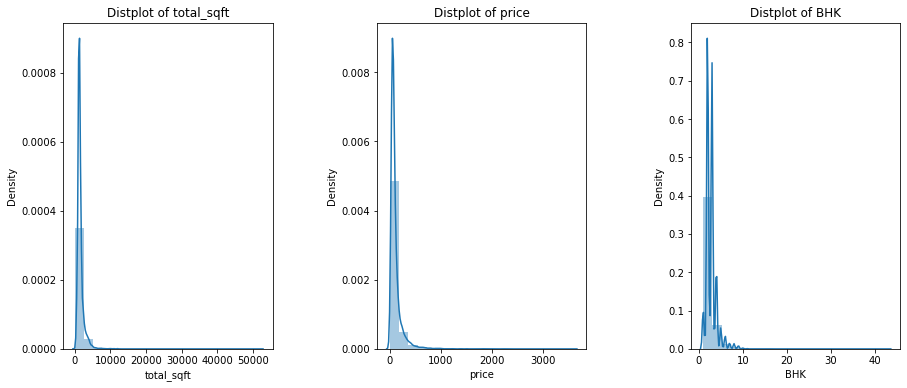

In [69]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in [  'total_sqft','price','BHK']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df2[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

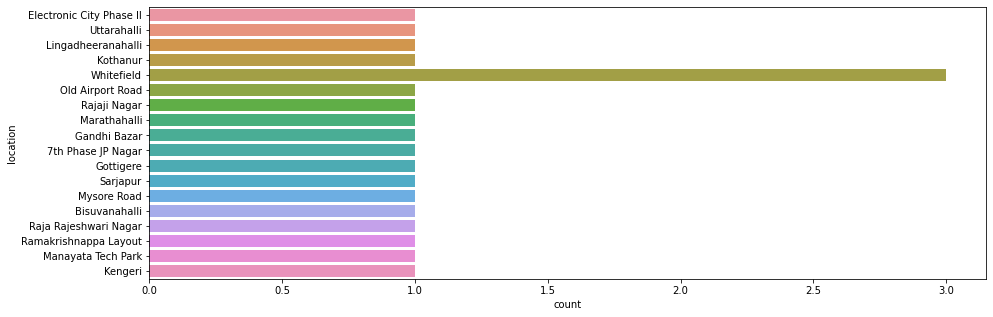

In [70]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'location' , data = df2.head(20))
plt.show()

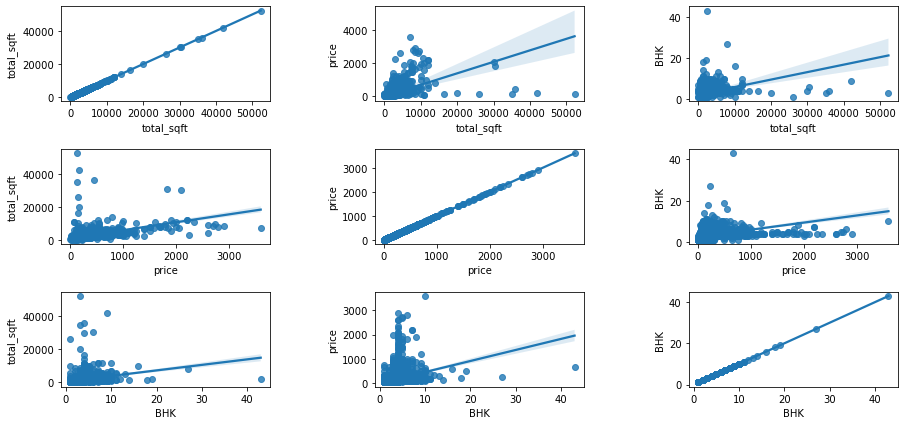

In [71]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['total_sqft' , 'price' , 'BHK']:
    for y in ['total_sqft' , 'price' , 'BHK']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df2)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [72]:
df2.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [73]:
df2.dropna()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [74]:
#feature engg

In [75]:
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']

C:\Users\yachi\AppData\Local\Temp\ipykernel_34404\409185182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']


In [76]:
df2['total_sqft'].unique()

array([1056. , 1440. , 1521. , ..., 1258.5,  774. , 4689. ])

In [81]:
df2

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [82]:
df2.drop('size',axis=1)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [83]:
df3=df2.copy()

In [84]:
df3

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [85]:
df3.location.value_counts()

Whitefield               540
Sarjapur  Road           397
Electronic City          302
Kanakpura Road           273
Thanisandra              234
                        ... 
Maruthi Extension          1
Okalipura                  1
Old Town                   1
Vasantapura main road      1
Abshot Layout              1
Name: location, Length: 1304, dtype: int64

In [86]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3['location'].value_counts(ascending=False)
location_stats

Whitefield                        541
Sarjapur  Road                    397
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [87]:
len(location_stats[location_stats<=10])

1052

In [88]:
# Dim Reduction in location

In [89]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                     10
Nagappa Reddy Layout              10
Naganathapura                     10
Dodsworth Layout                  10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [90]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())


242

In [91]:
df3

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


# outlier detection

In [92]:
df3[df3.total_sqft/df3.BHK<300]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [93]:

df4 = df3[~(df3.total_sqft/df3.BHK<300)]
df4.shape

(12559, 7)

In [94]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(10286, 7)

In [95]:
#df5['bath'] = df5['bath'].astype(float)

df5.bath.value_counts()


2.0           5924
3.0           2620
4.0            676
1.0            615
5.0            234
6.0            107
Whitefield      51
7.0             27
8.0             17
9.0             10
12.0             3
16.0             1
13.0             1
Name: bath, dtype: int64

In [96]:
df5

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10281,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10282,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10283,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10284,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [97]:
df5.describe()

,total_sqft,price,BHK,price_per_sqft
count,10286.000000,10286.000000,10286.000000,10286.000000
mean,1507.442466,91.247507,2.574762,5660.073288
std,879.932239,86.320253,0.898008,2265.606274
min,300.000000,10.000000,1.000000,1250.000000
25%,1109.000000,49.000000,2.000000,4250.000000
50%,1285.000000,67.000000,2.000000,5176.470588
75%,1650.000000,100.000000,3.000000,6428.571429
max,30400.000000,2200.000000,16.000000,24509.803922


In [98]:
df5.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
BHK               0
price_per_sqft    0
dtype: int64

In [99]:
df5.drop('size',inplace=True,axis=1)

In [100]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the "fuel" column
df5['location'] = label_encoder.fit_transform(df5['location'])


In [101]:
df5['bath'] = pd.to_numeric(df5['bath'], errors='coerce')

In [102]:
df5.isnull().sum()

location           0
total_sqft         0
bath              51
price              0
BHK                0
price_per_sqft     0
dtype: int64

In [103]:
df5.dropna(subset=['bath'], inplace=True)

In [104]:
df5

,location,total_sqft,bath,price,BHK,price_per_sqft
0,0,2850.0,4.0,428.00,4,15017.543860
1,0,1630.0,3.0,194.00,3,11901.840491
2,0,1875.0,2.0,235.00,3,12533.333333
3,0,1200.0,2.0,130.00,3,10833.333333
4,0,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...
10281,241,1353.0,2.0,110.00,2,8130.081301
10282,241,812.0,1.0,26.00,1,3201.970443
10283,241,1440.0,2.0,63.93,3,4439.583333
10284,241,1075.0,2.0,48.00,2,4465.116279


In [105]:
df6=df5[df5.bath<df5.BHK+2]

In [106]:
# x=df6.iloc[:,0:4].values
# y=df6.iloc[:,4].values

x=df6[['location','total_sqft','bath','BHK','price_per_sqft']].values
y=df6[['price']].values

In [107]:
df6.dtypes

location            int32
total_sqft        float64
bath              float64
price             float64
BHK                 int64
price_per_sqft    float64
dtype: object

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)


In [109]:
from sklearn.linear_model import LinearRegression
l1=LinearRegression()
l1.fit(x_train,y_train)

LinearRegression()

In [110]:
y_pred=l1.predict(x_test)

In [111]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)*100
acc

89.39508429312735

# Use K Fold cross validation to measure accuracy of our LinearRegression model


In [112]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.93881961, 0.92210852, 0.93430769, 0.92618993, 0.93463233])

# Find best model using GridSearchCV

In [113]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\Users\yachi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\yachi\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.931212,{'normalize': True}
1,lasso,0.932515,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.917525,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)


StandardScaler()

In [115]:
import pickle
with open('BangloreHousePricePrediction.pickle','wb') as f:
    pickle.dump(l1,f)

In [116]:
import json
columns = {
    'data_columns' : [col.lower() for col in df6.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))